In [12]:
import mglearn
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
plt.rcParams["figure.figsize"] = (60, 30)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
X = train.drop(['id', 'target'], axis=1)
y = train['target']
test = test.drop(['id'], axis=1)

In [27]:
print("특성 개수:",len(X.columns))

특성 개수: 300


특성이 300개가 있습니다.
이 300개의 특성이 타겟값에 얼마나 큰 영향을 미치는지에 대해서 살펴보면 되는 문제입니다

In [23]:
print("클래스별 샘플 개수:", 
      {n: v for n, v in zip((0, 1), np.bincount(y))})

클래스별 샘플 개수: {0: 183, 1: 67}


In [7]:
'''
클래스가 0과 1로 나뉘는 이진 분류문제이므로 사용할 수 있는 모델은

1. 선형 분류
2. 트리
3. 서포트 벡터 머신
4. MLP(신경망)

총 4가지 있습니다.

제가 여기서 사용한 모델은 2개

1. 선형 모델
2. 트리
입니다.

MLP를 사용하지 않은 이유 : 가중치를 해석하기 매우 어렵기 때문

딥러닝(신경망) 모델 채택 안한 이유
이도 위에서 결정 트리를 결정한것과 마찬가지로 특성별 가중치 비교가 매우 어렵습니다.
'''

' \n1. 선형 모델\n2. 나이브 베이즈\n3. 트리\n4. 서포트 벡터 머신\n'

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Text(0, 0.5, '특성 크기')

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


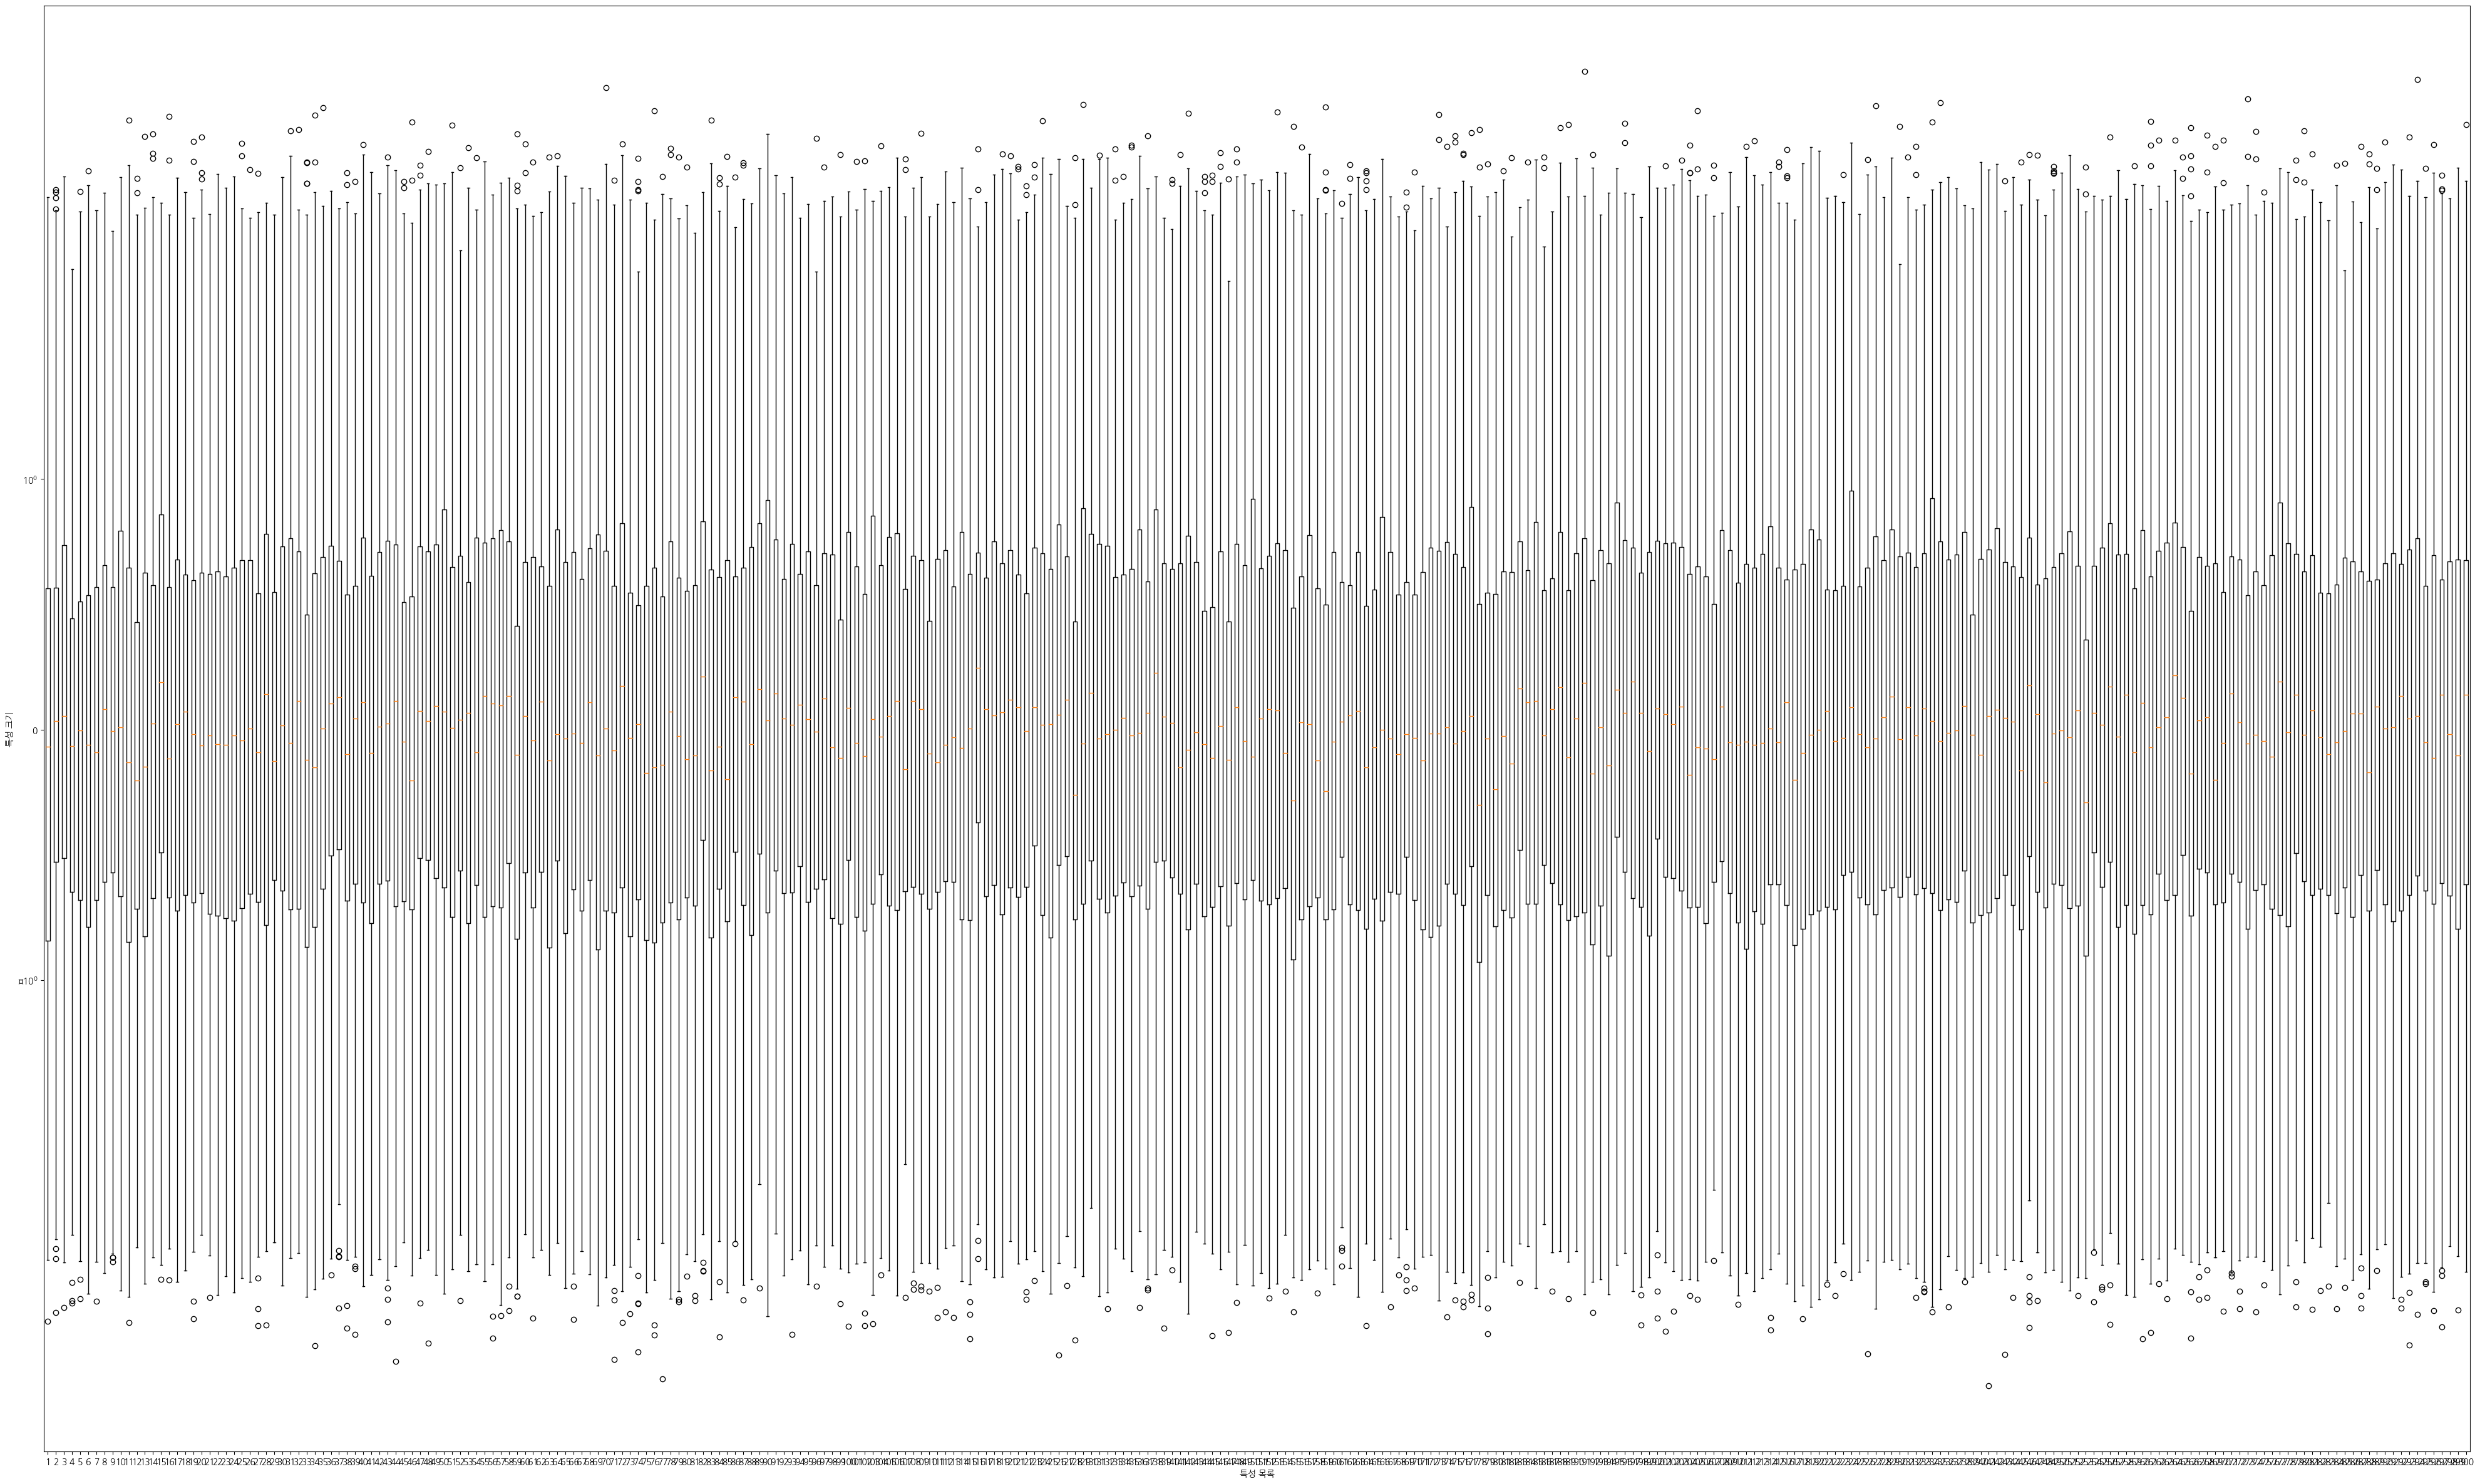

In [13]:
plt.figure(figsize=(50, 30))
plt.boxplot(X_train)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")

데이터의 특성 값 범위를 나타낸 plot입니다.
모든 특성의 크기(스케일)가 매우 비슷합니다.
보통 이러한 경우에는 SVM(서포트 벡터 머신)의 성능이 굉장히 좋아집니다.

In [11]:
for C in range(-3, 2):
    C = 10**C
    model = LogisticRegression(C = C, max_iter=50000).fit(X_train, y_train)
    print("C={:.3f} 인 로지스틱 분류의 훈련 정확도: {:.2f}".format(
        C, model.score(X_train, y_train)))
    print("C={:.3f} 인 로지스틱 분류의 테스트 정확도: {:.2f}".format(
        C, model.score(X_test, y_test)))
    print("사용한 특성의 개수:", np.sum(model.coef_ != 0))

C=0.001 인 릿지의 훈련 정확도: 0.73
C=0.001 인 릿지의 테스트 정확도: 0.75
사용한 특성의 개수: 300
C=0.010 인 릿지의 훈련 정확도: 0.93
C=0.010 인 릿지의 테스트 정확도: 0.73
사용한 특성의 개수: 300
C=0.100 인 릿지의 훈련 정확도: 1.00
C=0.100 인 릿지의 테스트 정확도: 0.68
사용한 특성의 개수: 300
C=1.000 인 릿지의 훈련 정확도: 1.00
C=1.000 인 릿지의 테스트 정확도: 0.63
사용한 특성의 개수: 300
C=10.000 인 릿지의 훈련 정확도: 1.00
C=10.000 인 릿지의 테스트 정확도: 0.63
사용한 특성의 개수: 300


C=0.01 인 l1 로지스틱 회귀의 훈련 정확도: 0.73
C=0.01 인 l1 로지스틱 회귀의 테스트 정확도: 0.75
C=0.10 인 l1 로지스틱 회귀의 훈련 정확도: 0.84
C=0.10 인 l1 로지스틱 회귀의 테스트 정확도: 0.71
C=1.00 인 l1 로지스틱 회귀의 훈련 정확도: 1.00
C=1.00 인 l1 로지스틱 회귀의 테스트 정확도: 0.67


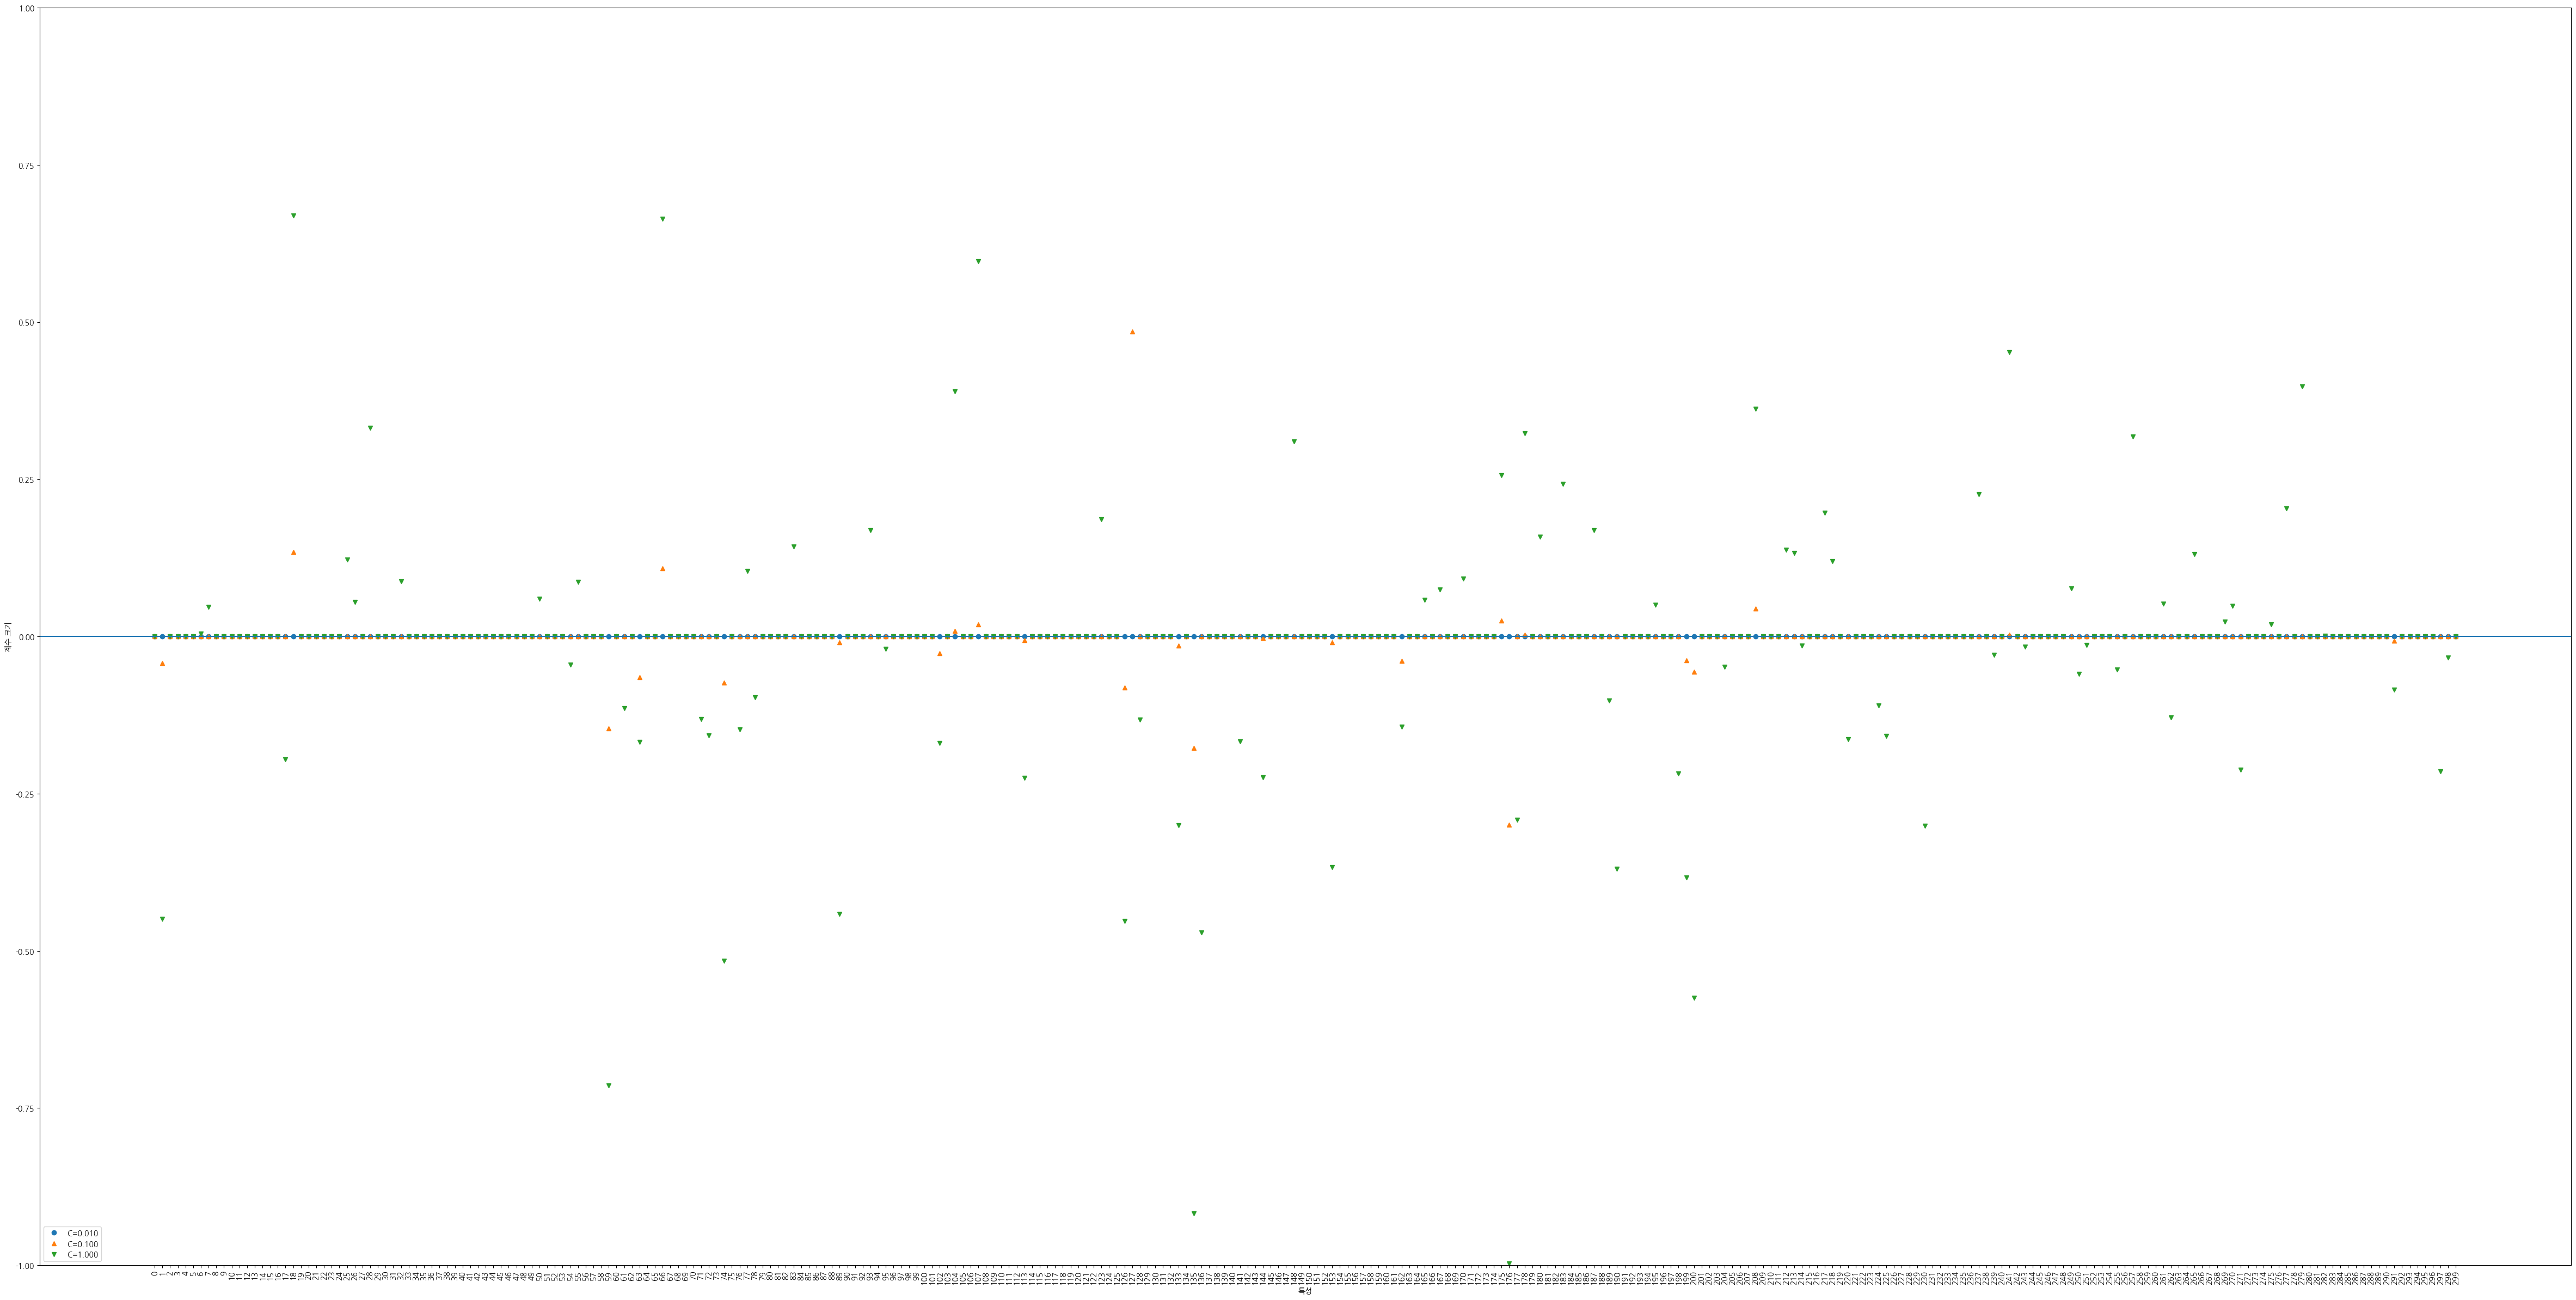

In [31]:
for C, marker in zip([0.01, 0.1, 1], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=50000).fit(X_train, y_train)
    print("C={:.2f} 인 l1 로지스틱 회귀의 훈련 정확도: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("C={:.2f} 인 l1 로지스틱 회귀의 테스트 정확도: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))    
plt.xticks(range(0, 300), rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-1, 1)
plt.legend(loc=3)
plt.savefig('savefig_default.png')

L2 제약 대신 L1 제약 사용한 이유 :
의미 있는 특성을 골라야 하는 입장에서
대부분의 계수를 0으로 만드는 L1 제약이 더 유용하기 때문입니다.

In [60]:
coef = lr_l1.coef_.T
np.where(coef>0)

(array([  6,   7,  18,  25,  26,  28,  32,  50,  55,  66,  77,  83,  93,
        104, 107, 123, 127, 148, 165, 167, 170, 175, 178, 180, 183, 187,
        195, 208, 212, 213, 217, 218, 237, 241, 249, 257, 261, 265, 269,
        270, 275, 277, 279, 282], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int64))

In [66]:
from sklearn.tree import DecisionTreeClassifier

for depth in range(1, 7):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    print("깊이 {}의 훈련 세트 정확도: {:.3f}".format(depth, tree.score(X_train, y_train)))
    print("깊이 {}의 테스트 세트 정확도: {:.3f}".format(depth, tree.score(X_test, y_test)))

깊이 1의 훈련 세트 정확도: 0.749
깊이 1의 테스트 세트 정확도: 0.667
깊이 2의 훈련 세트 정확도: 0.829
깊이 2의 테스트 세트 정확도: 0.794
깊이 3의 훈련 세트 정확도: 0.861
깊이 3의 테스트 세트 정확도: 0.746
깊이 4의 훈련 세트 정확도: 0.947
깊이 4의 테스트 세트 정확도: 0.714
깊이 5의 훈련 세트 정확도: 0.979
깊이 5의 테스트 세트 정확도: 0.730
깊이 6의 훈련 세트 정확도: 0.979
깊이 6의 테스트 세트 정확도: 0.698


In [67]:
from sklearn.tree import export_graphviz
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)

export_graphviz(tree, out_file="tree.dot", class_names=["0", "1"],
               impurity=False, filled=True)

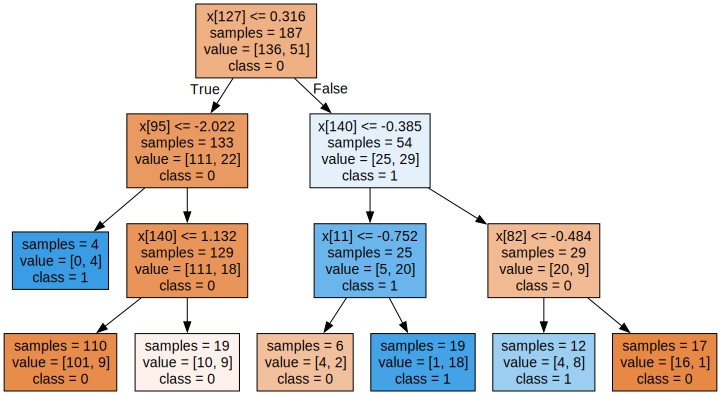

In [68]:
import graphviz

with open("tree.dot", encoding='UTF8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [102]:
def plot_feature_importances(model):
    n_features = 300
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features))
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    plt.savefig(f'plot_{model}.png')
    return model.feature_importances_

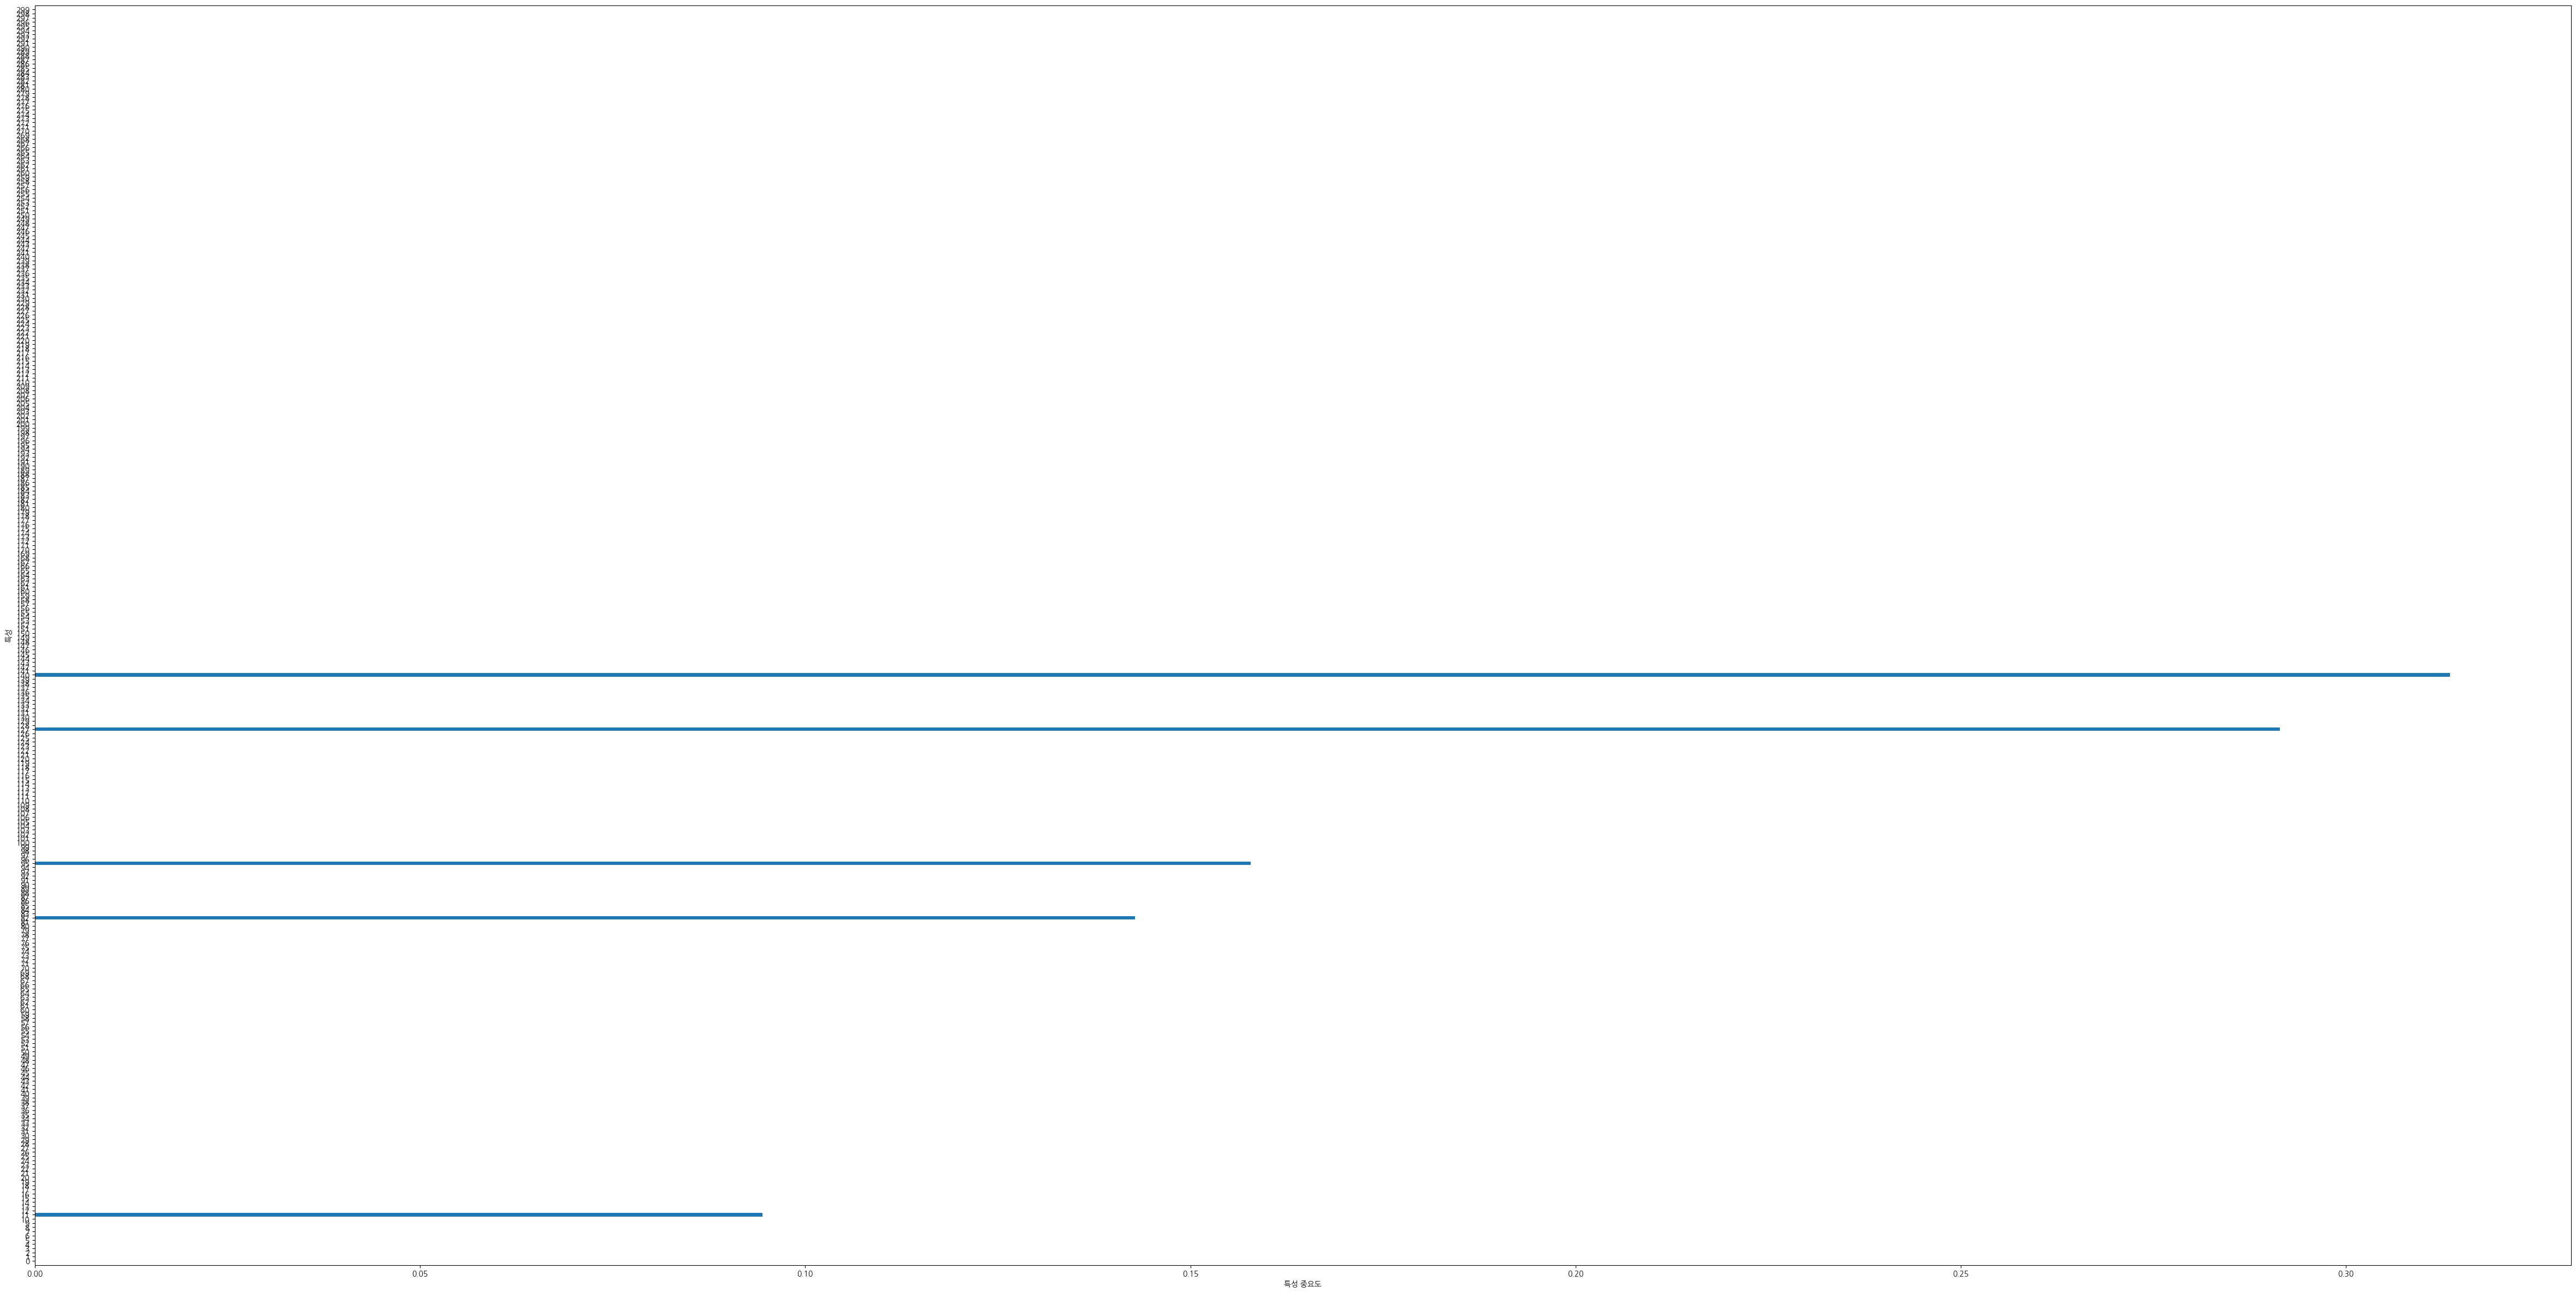

In [103]:
feature_list = plot_feature_importances(tree)

In [70]:
np.where(feature_list>0)

(array([ 11,  82,  95, 127, 140], dtype=int64),)

In [98]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

훈련 세트 정확도: 1.000
훈련 세트 정확도: 0.746


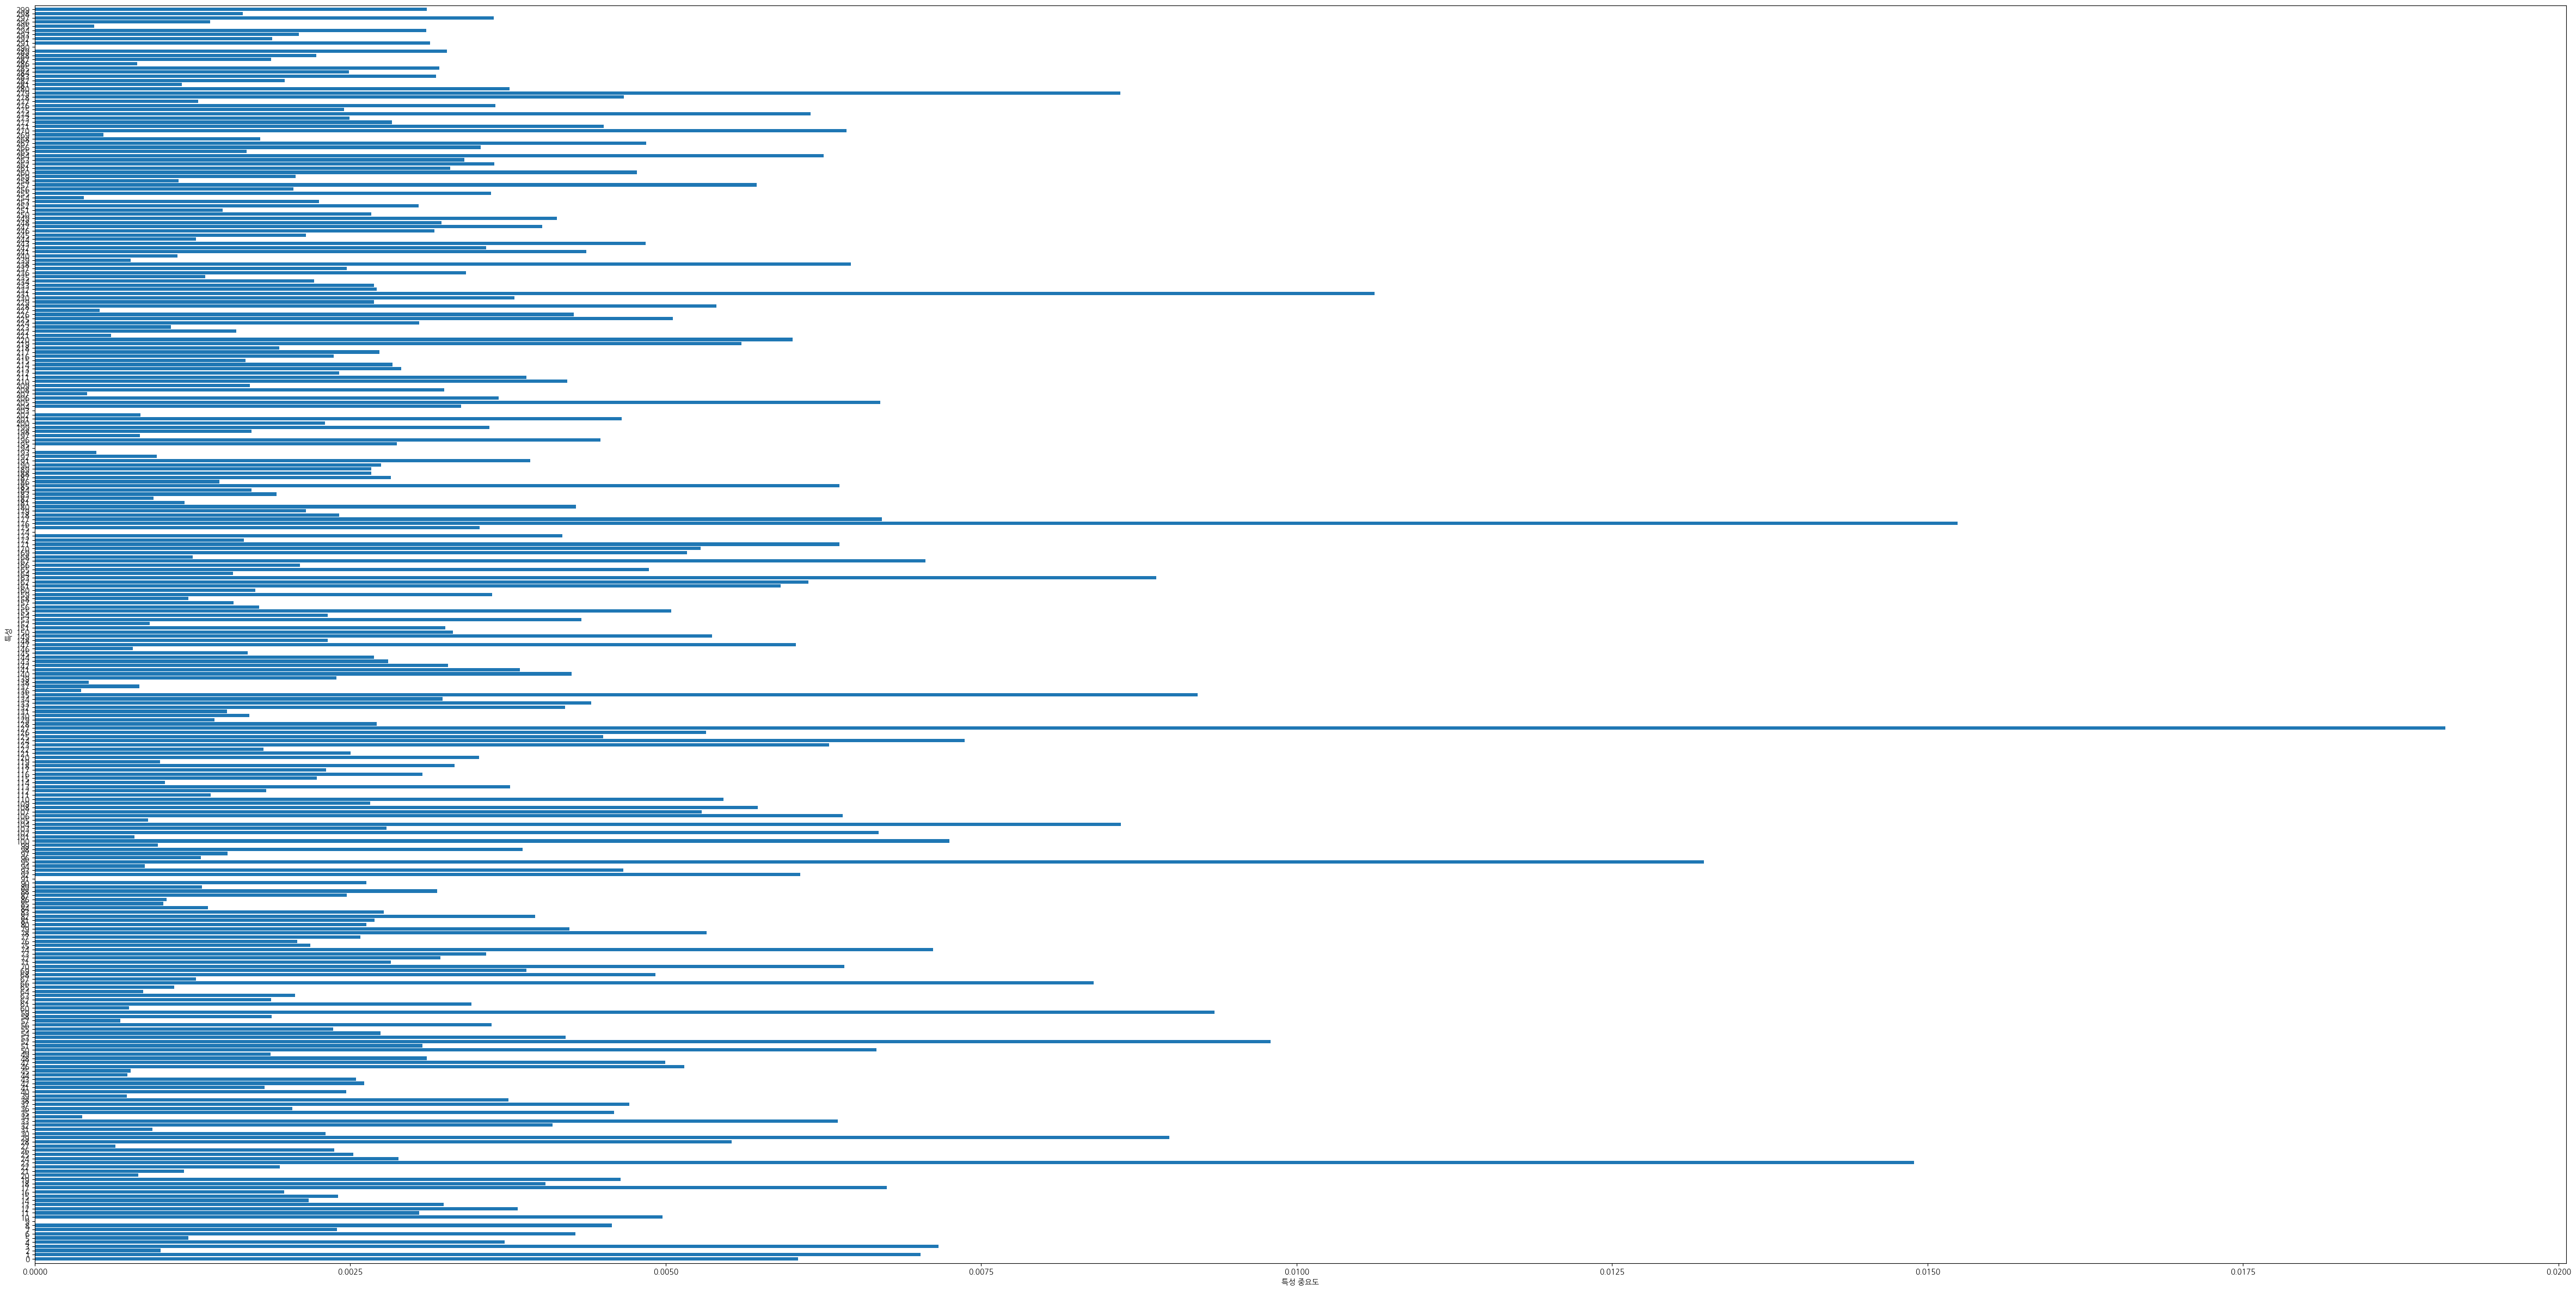

In [104]:
feature_forest_list = plot_feature_importances(forest)

랜덤 트리의 경우 많은 특성이 0이상의 중요도를 갖고 있습니다.
반면 결정 트리의 경우 몇몇 특성의 중요도만 확인할 수 있었기에,
랜덤 트리가 더 넓은 시각으로 데이터를 바라볼 수 있는 모델이라고 볼 수 있습니다.

In [67]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.9946524064171123
0.746031746031746


예상대로 SVC의 성능이 가장 좋지만 특성별 가중치를 구하는것이 불가능합니다. 그러므로 문제 해결에 도움이 되지 않습니다.

In [100]:
feature_forest_list

array([0.00605058, 0.00702102, 0.0009982 , 0.00716047, 0.00372554,
       0.00121939, 0.00428408, 0.00239474, 0.00457581, 0.        ,
       0.00497482, 0.00304704, 0.00382933, 0.00324008, 0.00217001,
       0.00240516, 0.00197492, 0.00675042, 0.00404557, 0.00464212,
       0.00082224, 0.00118161, 0.00194038, 0.01489483, 0.00288077,
       0.00252571, 0.00237167, 0.00063761, 0.00552393, 0.0089916 ,
       0.00230296, 0.00093312, 0.00410392, 0.00636309, 0.0003749 ,
       0.00459082, 0.00204211, 0.00471023, 0.00375384, 0.0007293 ,
       0.00246829, 0.00182012, 0.00260884, 0.00254789, 0.00073358,
       0.00076032, 0.00514745, 0.00499789, 0.00310883, 0.0018708 ,
       0.00666898, 0.00307317, 0.00979562, 0.00420829, 0.00273947,
       0.00236525, 0.003619  , 0.00067925, 0.00187725, 0.00934797,
       0.00074649, 0.0034617 , 0.00187209, 0.00206447, 0.00085988,
       0.00110657, 0.00838985, 0.00127995, 0.00491926, 0.00389508,
       0.00641418, 0.0028221 , 0.00321637, 0.00357517, 0.00711

In [146]:
feature_data_1 = pd.DataFrame(feature_forest_list)
feature_data_1.tail()

,0
295,0.000472
296,0.001390
297,0.003637
298,0.001647
299,0.003106


In [147]:
feature_data_2 = pd.DataFrame(coef, columns=[1])
feature_data_2.tail()

,1
295,0.000000
296,0.000000
297,-0.214376
298,-0.033275
299,0.000000


In [148]:
feature_data = pd.concat([feature_data_1, feature_data_2], axis=1)
feature_data.tail()

,0,1
295,0.000472,0.000000
296,0.001390,0.000000
297,0.003637,-0.214376
298,0.001647,-0.033275
299,0.003106,0.000000


In [168]:
feature_data_total = feature_data[(feature_data[0] >= 0.005) & (feature_data[1] != 0)]

In [169]:
feature_data_total = feature_data_total.drop(columns=1,axis=0).sort_values(0, ascending=False)
feature_data_total

,0
127,0.019105
176,0.015239
95,0.013227
59,0.009348
135,0.009216
104,0.008608
279,0.008602
66,0.008390
74,0.007119
167,0.007058
